In [338]:
import pandas as pd

In [339]:
with open('out/log') as fh:
    lines = fh.readlines()

In [344]:
def parse_log(log):
    a = [line.strip('\n').split(' ') for line in log]
    d = defaultdict(dict)
    
    for line in a:
        step = int(line[1])
        for k, v in zip(line[2::2], line[3::2]):
            d[step][k] = float(v)
            
    return pd.DataFrame(d.values(), index=d.keys())

In [362]:
import glob
import matplotlib.pyplot as plt

In [363]:
runs = glob.glob('out/*/log')

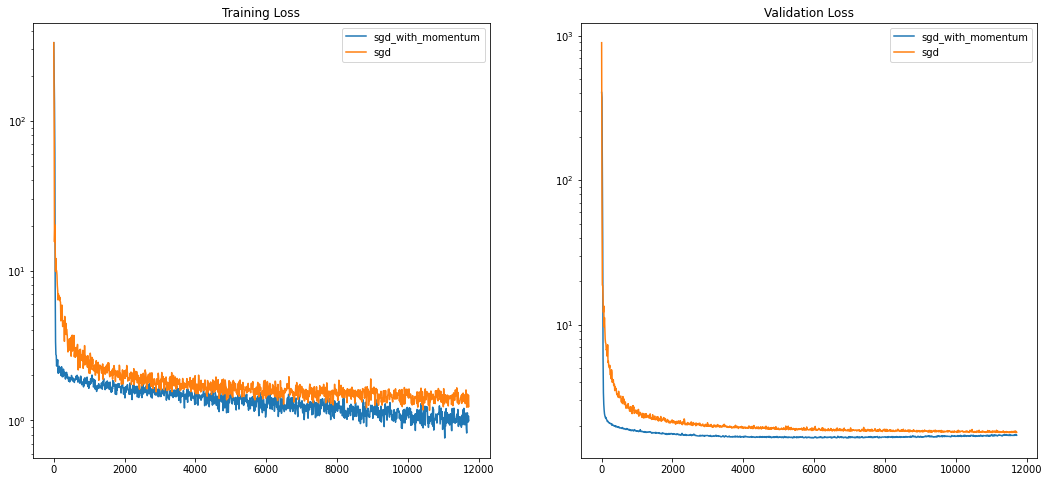

In [367]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))

for run in runs:
    optimizer = run.split('/')[1]
    with open(run) as fh:
        df = parse_log(fh.readlines())
    df.plot(logy=True, ax=ax[0], y='train_loss', label=optimizer)
    ax[0].set_title('Training Loss')
    df.plot(logy=True, ax=ax[1], y='val_loss', label=optimizer)
    ax[1].set_title('Validation Loss')
    